# The main task is answer a question which data (columns) have the most impact on decision if the client will subscribe a term deposit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindata = pd.read_csv('bank-full.csv', index_col = False)
testdata = pd.read_csv('bank.csv', index_col = False)

In [3]:
traindata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
testdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Changing some columns name into more understanding expressions

In [5]:
new_columns_name = {"default": "default_credit",
                   "day": "contact-dayofmonth",
                   "month": "contact-month",
                   "duration": "contact-duration",
                   "pdays": "past_days_call",
                   "previous": "contacts_before_campaign",
                   "poutcome": "outcome_previous_campaign",
                   "y": "term_deposit"}

traindata = traindata.rename(columns = new_columns_name)
testdata = testdata.rename(columns = new_columns_name)

### Are there any inproper or missing data? (project description said that data is complete, but we check it)

In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        45211 non-null  int64 
 1   job                        45211 non-null  object
 2   marital                    45211 non-null  object
 3   education                  45211 non-null  object
 4   default_credit             45211 non-null  object
 5   balance                    45211 non-null  int64 
 6   housing                    45211 non-null  object
 7   loan                       45211 non-null  object
 8   contact                    45211 non-null  object
 9   contact-dayofmonth         45211 non-null  int64 
 10  contact-month              45211 non-null  object
 11  contact-duration           45211 non-null  int64 
 12  campaign                   45211 non-null  int64 
 13  past_days_call             45211 non-null  int64 
 14  contac

In [7]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        4521 non-null   int64 
 1   job                        4521 non-null   object
 2   marital                    4521 non-null   object
 3   education                  4521 non-null   object
 4   default_credit             4521 non-null   object
 5   balance                    4521 non-null   int64 
 6   housing                    4521 non-null   object
 7   loan                       4521 non-null   object
 8   contact                    4521 non-null   object
 9   contact-dayofmonth         4521 non-null   int64 
 10  contact-month              4521 non-null   object
 11  contact-duration           4521 non-null   int64 
 12  campaign                   4521 non-null   int64 
 13  past_days_call             4521 non-null   int64 
 14  contacts

### There is no need to change a structure/values of the tables (columns have proper default data types and there are no missed data)

---

# **Statistic info**

## Compare basic stats in both datasets (training and testing).

In [8]:
traindata.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.9,10.6,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.3,3044.8,-8019.0,72.0,448.0,1428.0,102127.0
contact-dayofmonth,45211.0,15.8,8.3,1.0,8.0,16.0,21.0,31.0
contact-duration,45211.0,258.2,257.5,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.8,3.1,1.0,1.0,2.0,3.0,63.0
past_days_call,45211.0,40.2,100.1,-1.0,-1.0,-1.0,-1.0,871.0
contacts_before_campaign,45211.0,0.6,2.3,0.0,0.0,0.0,0.0,275.0


In [9]:
testdata.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.2,10.6,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.7,3009.6,-3313.0,69.0,444.0,1480.0,71188.0
contact-dayofmonth,4521.0,15.9,8.2,1.0,9.0,16.0,21.0,31.0
contact-duration,4521.0,264.0,259.9,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.8,3.1,1.0,1.0,2.0,3.0,50.0
past_days_call,4521.0,39.8,100.1,-1.0,-1.0,-1.0,-1.0,871.0
contacts_before_campaign,4521.0,0.5,1.7,0.0,0.0,0.0,0.0,25.0


### Very good representation training data by testing data (their most important statistics parameters: **mean**, **std**, **median** have similar values).

---

## Looking for ***Pearson*** and ***Spearman correlation***

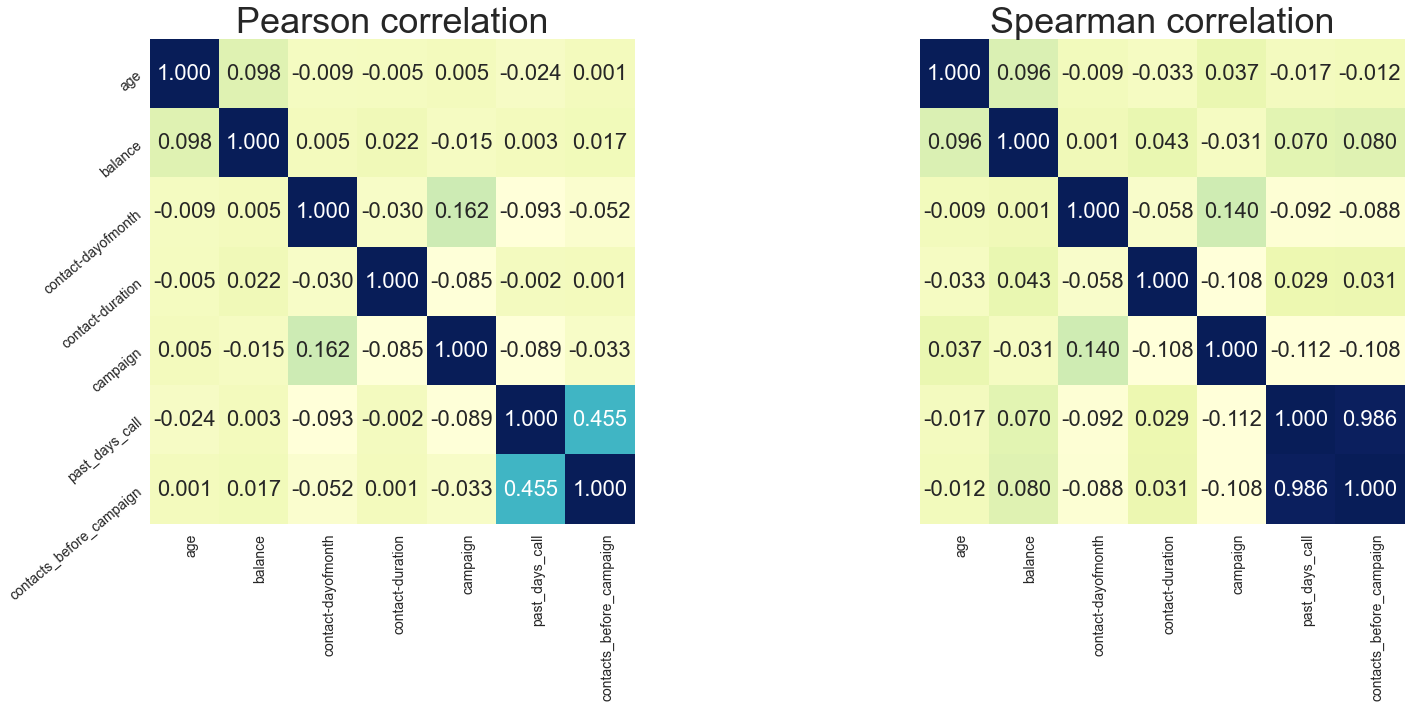

In [10]:
sns.set()

# Draw a heatmap with the numeric values in each cell
fig = plt.figure(figsize=(24, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax_array = [ax1, ax2]
correlation_data = [traindata.corr(method='pearson'), traindata.corr(method='spearman')]
titles_array = ['Pearson correlation', 'Spearman correlation']

# We use axs parameter to tell seaborn which subplot to use
for axs, data, titles in zip(ax_array, correlation_data, titles_array):
    sns.heatmap(data = data, fmt = '.3f', square = True, cbar=False, cmap = "YlGnBu",
                annot = True, annot_kws = {"fontsize": 22}, ax = axs)
    axs.set_title(titles, fontsize = 36)
    tick_labels = ax1.get_xticklabels()
    axs.set_xticklabels(tick_labels, rotation = 90, ha = "right", rotation_mode = "anchor", fontsize = 14)
    axs.set_yticklabels(tick_labels, rotation = 40, ha = "right", rotation_mode = "anchor", fontsize = 14)
    
# Y axis description on the left side only
ax2.set_yticklabels([])

plt.tight_layout()
plt.show()

### **Conclusion:**
### High correlation between `contacts_before_campaign` and `past_days_call` is sensible (making the calls to the same person/client very often is depended on banking campaigns).

### I decide to remove `'past_days_call'` from the both tables.

In [11]:
traindata = traindata.drop('past_days_call', axis=1)
testdata = testdata.drop('past_days_call', axis=1)

***

## Visual representation of dependancies between numerical data columns and target class **`'term_deposit'`**

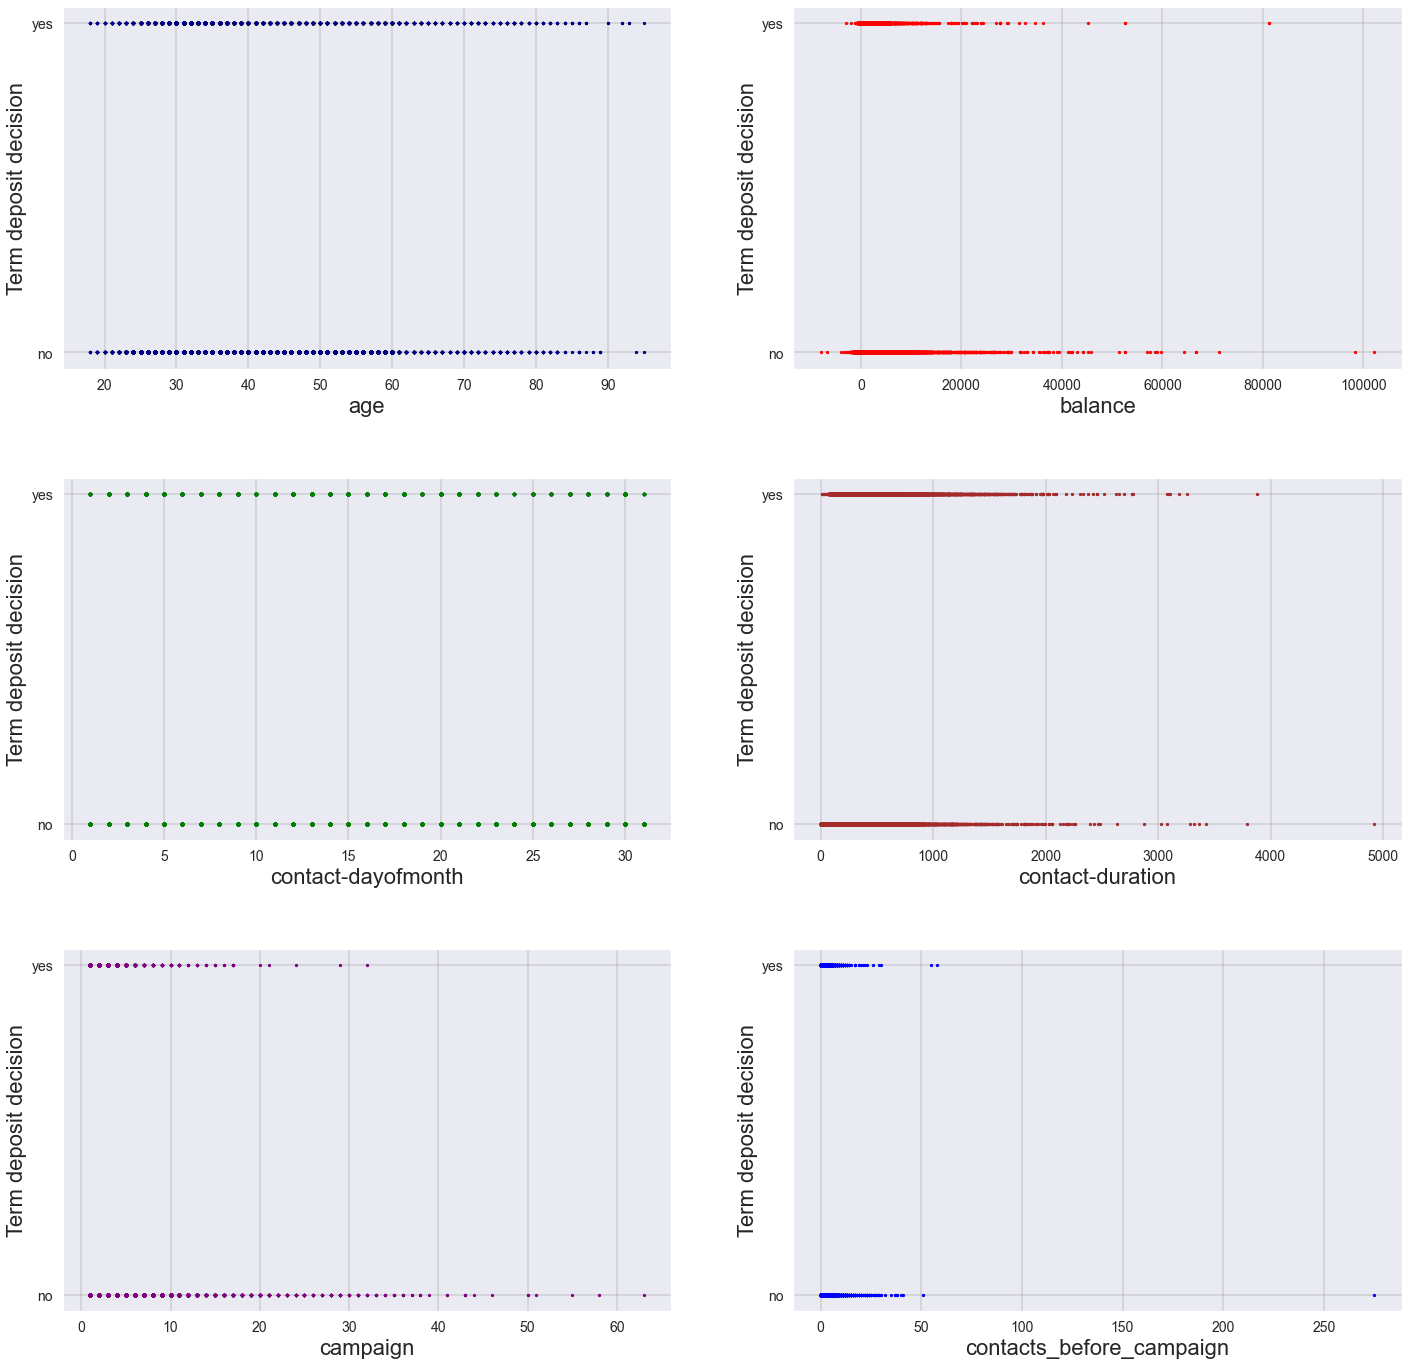

In [12]:
column_names = traindata.select_dtypes(include = 'number').columns
colors = ['navy', 'red', 'green', 'brown', 'purple', 'blue']

fig, ax = plt.subplots(3, 2, figsize=(24, 24))
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plots = [ax[i, j] for i in range(0, 3) for j in range(0, 2)]

for column, colors, axs in zip(column_names, colors, plots):
    ## 2-D plots array
    axs.scatter(traindata[column], traindata['term_deposit'], c=colors, s=5)
    axs.set_xlabel(column, fontsize=22)
    axs.set_ylabel('Term deposit decision', fontsize=22)
    axs.tick_params(labelsize=14)
    axs.grid(color='grey', linestyle='-', linewidth=0.4)
    
plt.show()

### There are no clear dependancy between ***any x-axis data*** and `'term-deposit'` values (`'yes'`/`'no'` decision). The `'balance'` and `'age'` columns will be checking more closely, because results from these plots are... suspected. 
### Let's dive in:

In [13]:
traindata.groupby('term_deposit')['balance'].count()

term_deposit
no     39922
yes     5289
Name: balance, dtype: int64

In [14]:
traindata.groupby('term_deposit')['age'].count()

term_deposit
no     39922
yes     5289
Name: age, dtype: int64

### There are the same number of ***yes/no*** decisions for both columns.

### We take a look at the 2 extreme cases:
1) ***maximum balance when person did not get term deposit***,
2) ***minimum balance when person did get term deposit***.

In [15]:
## Option 1
opt1 = traindata.query("`term_deposit` == 'no'")['balance'].max()

## Option 2
opt2 = traindata.query("`term_deposit` == 'yes'")['balance'].min()

### Searching in the table **traindata** above 2 results

In [16]:
traindata[(traindata['balance']==opt1) | (traindata['balance']==opt2)]

,age,job,marital,education,default_credit,balance,housing,loan,contact,contact-dayofmonth,contact-month,contact-duration,campaign,contacts_before_campaign,outcome_previous_campaign,term_deposit
32713,39,self-employed,married,tertiary,no,-3058,yes,yes,cellular,17,apr,882,3,0,unknown,yes
39989,51,management,single,tertiary,no,102127,no,no,cellular,3,jun,90,1,0,unknown,no


### Which other things could be the reasons of making ***'yes'***/***'no'*** term deposit decisions by bank?

### From directly comparison 2 rows (indexes) we can get the most important differences that may affect on final decision. There are:
- 'job',
- 'marital',
- 'housing',
- 'loan',
- 'contact-duration',
- 'campaign'.

---

# **Classification methods**

## Using algorithms we will be looking for dependencies between data in column `'term_deposit'` and the rest of data in the table.

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

numeric_features1 = traindata.select_dtypes(include = 'number').columns
numeric_features2 = testdata.select_dtypes(include = 'number').columns
numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])

categorical_features1 = traindata.select_dtypes(exclude = 'number').columns.drop('term_deposit')
categorical_features2 = testdata.select_dtypes(exclude = 'number').columns.drop('term_deposit')
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

preprocessor = ColumnTransformer(transformers = [('num1', numeric_transformer, numeric_features1),
                                                 ('num2', numeric_transformer, numeric_features2),
                                                 ('cat1', categorical_transformer, categorical_features1),
                                                 ('cat2', categorical_transformer, categorical_features2)])

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [18]:
# Train and test data are splitted into X (features) and y (target = 'term_deposit')
X_train, y_train = traindata.drop('term_deposit', axis = 1), traindata['term_deposit']
X_test, y_test = testdata.drop('term_deposit', axis = 1), testdata['term_deposit']

# Append classifier to preprocessing pipeline.

In [19]:
def Default_hyperparam_results(algorithm):
    clf = Pipeline(steps = [('preprocessor', preprocessor),
                            ('classifier', algorithm)])
    clf.fit(X_train, y_train)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    ## Classifier name and accuracy score to compare them in Dataframe later
    return [algorithm.__class__.__name__, (100*(acc_score)).round(2)]

## **1. Linear classifiers:** LogisticRegression, Ridge, SGD

In [20]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier

LogisticRegr_results = Default_hyperparam_results(LogisticRegression(max_iter = 10000))
Ridge_results = Default_hyperparam_results(RidgeClassifier(max_iter = 10000))
SGD_results = Default_hyperparam_results(SGDClassifier(max_iter = 10000))

## **2. Neighbors classifiers:** KNeighbors, NearestCentroid

In [21]:
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid

KNeighbors_results = Default_hyperparam_results(KNeighborsClassifier())
NearestCentroid_results = Default_hyperparam_results(NearestCentroid())

## **3. Tree-based classifiers:** DecisionTree, ExtraTree, RandomForest

In [22]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier

DecisionTree_results = Default_hyperparam_results(DecisionTreeClassifier())
ExtraTree_results = Default_hyperparam_results(ExtraTreeClassifier())
RandomForest_results = Default_hyperparam_results(RandomForestClassifier())

## **4. SVM classifiers:** SVC, LinearSVC

In [23]:
from sklearn.svm import SVC, LinearSVC

SVC_results = Default_hyperparam_results(SVC(max_iter = 1e9))
LinearSVC_results = Default_hyperparam_results(LinearSVC(max_iter = 1e9))

### **Get all the results into Dataframe and find best acccuracy result**

In [24]:
df_default_params_results = pd.DataFrame(data = [LogisticRegr_results, Ridge_results, SGD_results, 
                                                 KNeighbors_results, NearestCentroid_results,
                                                 DecisionTree_results, ExtraTree_results, RandomForest_results,
                                                 SVC_results, LinearSVC_results],
                                          columns = ['Classifier', 'Accuracy_score'])
                                          
df_default_params_results_sorted = df_default_params_results.sort_values(by='Accuracy_score', ascending=False, ignore_index=True)

In [25]:
df_default_params_results_sorted

,Classifier,Accuracy_score
0,DecisionTreeClassifier,100.00
1,ExtraTreeClassifier,100.00
2,RandomForestClassifier,100.00
3,KNeighborsClassifier,91.77
4,SVC,91.35
5,SGDClassifier,90.44
6,LogisticRegression,90.20
7,LinearSVC,90.00
8,RidgeClassifier,89.71
9,NearestCentroid,83.63


### Are accuracy scores = 100% for tree-based classifiers fake? There are 2 options:
- use different classification score metric,
- default hyperparameter *'max_depth'* is not specified, so tree is growing till every node is equal 1 and every single sample is calculating and comparing with its neighbours

In [26]:
classifier = [DecisionTreeClassifier(), RandomForestClassifier(), ExtraTreeClassifier()]
tree_num = range(5, 55, 5)

def accuracy_results_with_hyperparameters(classifier, tree_num):
    _ = []
    for clf in classifier:
        clf_name = clf.__class__.__name__
        print(f'For "{clf_name}":')
        for n in tree_num:
            clf_pipe = Pipeline(steps = [('preprocessor', preprocessor),
                                        ('classifier', clf.set_params(**{'max_depth': n}))])
            clf_pipe.fit(X_train, y_train)
            y_pred = clf_pipe.fit(X_train, y_train).predict(X_test)
            acc_score = accuracy_score(y_test, y_pred)
            print(f'\tAccuracy = {100*(acc_score):.2f}% for max_depth = {n}')

accuracy_results_with_hyperparameters(classifier, tree_num)

For "DecisionTreeClassifier":
	Accuracy = 90.33% for max_depth = 5
	Accuracy = 92.37% for max_depth = 10
	Accuracy = 95.53% for max_depth = 15
	Accuracy = 98.34% for max_depth = 20
	Accuracy = 99.56% for max_depth = 25
	Accuracy = 99.91% for max_depth = 30
	Accuracy = 100.00% for max_depth = 35
	Accuracy = 100.00% for max_depth = 40
	Accuracy = 100.00% for max_depth = 45
	Accuracy = 100.00% for max_depth = 50
For "RandomForestClassifier":
	Accuracy = 89.45% for max_depth = 5
	Accuracy = 92.61% for max_depth = 10
	Accuracy = 96.68% for max_depth = 15
	Accuracy = 98.94% for max_depth = 20
	Accuracy = 99.82% for max_depth = 25
	Accuracy = 99.96% for max_depth = 30
	Accuracy = 100.00% for max_depth = 35
	Accuracy = 100.00% for max_depth = 40
	Accuracy = 100.00% for max_depth = 45
	Accuracy = 100.00% for max_depth = 50
For "ExtraTreeClassifier":
	Accuracy = 90.27% for max_depth = 5
	Accuracy = 90.47% for max_depth = 10
	Accuracy = 91.15% for max_depth = 15
	Accuracy = 94.60% for max_depth =

### There are 2 things to notice:
- with only `max_depth`=10 accuracy result in DecisionTree and RandomForest classifiers are higher than accuracy for the another type of classifiers (92.35% vs. 91.77%),
- accuracy score is equal 100% when depth of the algorythm tree is 35 - it means that value in all tree nodes=1.

In [27]:
clf = Pipeline(steps = [('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(max_depth=35))])
clf.fit(X_train, y_train)
y_pred = clf.fit(X_train, y_train).predict(X_test)
acc_score = accuracy_score(y_test, y_pred)

### Data achieved with the best accuracy result will be saved as a pandas DataFrame and into the csv file.

In [28]:
final_pred_values = pd.DataFrame(data={'Y predicted': y_pred, 'Y real': y_test})
final_pred_values[['accuracy score', 'max_depth']] = [100*(acc_score), 35]
final_pred_values.set_index(['accuracy score', 'max_depth'])

Y predicted Y real
accuracy score max_depth                   
100.0          35                 no     no
               35                 no     no
               35                 no     no
               35                 no     no
               35                 no     no
...                              ...    ...
               35                 no     no
               35                 no     no
               35                 no     no
               35                 no     no
               35                 no     no

[4521 rows x 2 columns]

In [29]:
final_pred_values.to_csv('predicted_values.csv', index = False)
final_pred_values = pd.read_csv('predicted_values.csv', index_col = False)

### As an additional info ***classification report*** and ***confusion matrix*** are visible below

In [30]:
classif_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print('Classification report: \n', classif_report, '\n\n')
print('Confusion matrix: \n', conf_matrix)

Classification report: 
               precision    recall  f1-score   support

          no       1.00      1.00      1.00      4000
         yes       1.00      1.00      1.00       521

    accuracy                           1.00      4521
   macro avg       1.00      1.00      1.00      4521
weighted avg       1.00      1.00      1.00      4521
 


Confusion matrix: 
 [[4000    0]
 [   0  521]]


---

## Final conclusion:
### All parameters from ***classification report*** are equal 100%; ***confusion matrix*** show that no observations from more than 4500 of total were wrong classificated.
### Prediction is completed.